In [1]:
%matplotlib inline

In [2]:
#  Copyright (c) 2021 MetPy Developers.
#  Distributed under the terms of the BSD 3-Clause License.
#  SPDX-License-Identifier: BSD-3-Clause

# Raster Plots using Declarative Syntax

The MetPy declarative syntax allows for a simplified interface to creating common
meteorological analyses including surface observation plots. This example creates
a temperature raster plot, though other potential raster plots include radar.

In [3]:
import xarray as xr

from metpy.cbook import get_test_data
from metpy.plots import MapPanel, PanelContainer, RasterPlot
from metpy.units import units

Import the temperature data from the NARR file.

In [4]:
narr_data = xr.open_dataset(get_test_data('narr_example.nc', as_file_obj=False))

Preview the data:

In [5]:
narr_data

<xarray.Dataset> Size: 21MB
Dimensions:              (time: 1, isobaric: 29, y: 118, x: 292)
Coordinates:
  * time                 (time) datetime64[ns] 8B 1987-04-04T18:00:00
  * isobaric             (isobaric) float64 232B 1e+03 975.0 ... 125.0 100.0
  * y                    (y) float64 944B -3.087e+03 -3.054e+03 ... 678.9 711.4
  * x                    (x) float64 2kB -3.977e+03 -3.945e+03 ... 5.47e+03
Data variables:
    Temperature          (time, isobaric, y, x) float32 4MB ...
    Lambert_Conformal    |S1 1B ...
    lat                  (y, x) float64 276kB ...
    lon                  (y, x) float64 276kB ...
    u_wind               (time, isobaric, y, x) float32 4MB ...
    v_wind               (time, isobaric, y, x) float32 4MB ...
    Geopotential_height  (time, isobaric, y, x) float32 4MB ...
    Specific_humidity    (time, isobaric, y, x) float32 4MB ...
Attributes: (12/14)
    Conventions:              CF-1.0
    Originating_center:       US National Weather Service - NCEP(WMC) (7)
    Originating_subcenter:    The North American Regional Reanalysis (NARR) P...
    Generating_Model:         North American Regional Reanalysis (NARR)
    Product_Type:             Forecast/Uninitialized Analysis/Image Product
    title:                    US National Weather Service - NCEP(WMC) North A...
    ...                       ...
    history:                  Direct read of GRIB-1 into NetCDF-Java 4 API
    CF:feature_type:          GRID
    file_format:              GRIB-1
    location:                 /nomads3_data/raid2/noaaport/merged/narr/198704...
    _CoordinateModelRunDate:  1987-04-04T18:00:00Z
    History:                  Translated to CF-1.0 Conventions by Netcdf-Java...

Create the 'RasterPlot' object and provide it with the NARR data. Specify the level to be
plotted, and use the Data variables column to specify the data field to be plotted.

In [6]:
raster = RasterPlot()
raster.data = narr_data
raster.field = 'Temperature'
raster.level = 700 * units.hPa

Add the plot to a Map Panel and Panel Container.

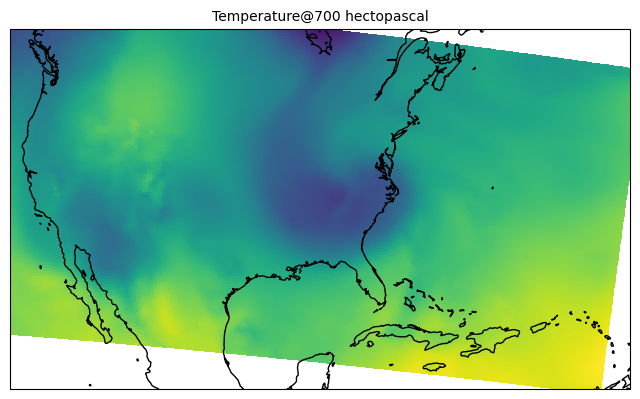

In [7]:
panel = MapPanel()
panel.area = 'us'
panel.projection = 'lcc'
panel.layers = ['coastline']
panel.plots = [raster]

pc = PanelContainer()
pc.size = (8, 8)
pc.panels = [panel]
pc.draw()

pc.show()